validation dataset is split from train (main) dataset

validation dataset =/= test dataset

added wandb !!!

In [1]:
from pipeline02 import *

from PIL import Image

In [2]:
RANDOM_SEED = 1
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001

In [3]:
pl = Pipeline(task='classification', optimizer=torch.optim.Adam, loss_fn=nn.CrossEntropyLoss(), 
              random_seed=RANDOM_SEED, 
              batch_size=BATCH_SIZE, 
              epochs=EPOCHS,
              learning_rate=LEARNING_RATE, 
              wandb_log=True, progressbar=True)

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    # transforms.Normalize((0.5,), (0.5,)),
])

In [5]:
pl.load_mnist(root_for_data='../pytorch/MNIST_data/', transform=transform)

main dataset size: 60000
test dataset size: 10000
train dataset size: 50000
validation dataset size: 10000


In [6]:
X = next(iter(pl.train_loader))

In [7]:
X[0].shape

torch.Size([32, 1, 28, 28])

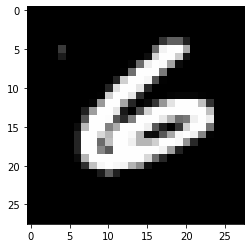

In [8]:
plt.imshow(X[0][2].view(28,28), cmap='gray')

In [9]:
wandb.login()

wandb: Currently logged in as: teamtom (use `wandb login --relogin` to force relogin)


True

In [10]:
wandb.init(project='mnist-with-pipeline+wandb')

In [11]:
cnf = wandb.config
cnf.update({
    "random_seed" : RANDOM_SEED, "epochs" : EPOCHS, "batch_size": BATCH_SIZE, "learning_rate" : LEARNING_RATE
})

In [12]:
%%time

model = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
            # nn.Dropout(0.2),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 64, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
            # nn.Dropout(0.2),
        nn.MaxPool2d(2, 2),
            # nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1),
            # nn.ReLU(),
            # nn.Dropout(0.2),
            # nn.MaxPool2d(2, 2),
        nn.Flatten(), 
        nn.Linear(64 * 7 * 7, 128), # 28x28 images
        nn.ReLU(),
            # nn.Linear(128, 64),
            # nn.ReLU(),
        nn.Linear(128, 10)
    ).to(pl.device)
    
history = pl.fit(model)

Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:39, 39.04batch/s]

| Epoch: 0001 | Train Loss: 0.176 | Train Acc: 94.58% | Val. Loss: 0.056 | Val. Acc: 98.15% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:47, 32.96batch/s]

| Epoch: 0002 | Train Loss: 0.050 | Train Acc: 98.46% | Val. Loss: 0.044 | Val. Acc: 98.52% |


Training  :   0%|1                                                                                                   | 3/1563 [00:00<01:13, 21.16batch/s]

| Epoch: 0003 | Train Loss: 0.035 | Train Acc: 98.89% | Val. Loss: 0.047 | Val. Acc: 98.69% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:40, 38.21batch/s]

| Epoch: 0004 | Train Loss: 0.026 | Train Acc: 99.16% | Val. Loss: 0.035 | Val. Acc: 98.75% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:44, 35.15batch/s]

| Epoch: 0005 | Train Loss: 0.019 | Train Acc: 99.38% | Val. Loss: 0.040 | Val. Acc: 98.68% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:40, 38.25batch/s]

| Epoch: 0006 | Train Loss: 0.014 | Train Acc: 99.53% | Val. Loss: 0.039 | Val. Acc: 98.83% |


Training  :   0%|1                                                                                                   | 2/1563 [00:00<01:22, 18.82batch/s]

| Epoch: 0007 | Train Loss: 0.012 | Train Acc: 99.60% | Val. Loss: 0.046 | Val. Acc: 98.64% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:42, 37.10batch/s]

| Epoch: 0008 | Train Loss: 0.010 | Train Acc: 99.66% | Val. Loss: 0.038 | Val. Acc: 98.92% |


Training  :   0%|2                                                                                                   | 4/1563 [00:00<00:45, 33.90batch/s]

| Epoch: 0009 | Train Loss: 0.008 | Train Acc: 99.74% | Val. Loss: 0.046 | Val. Acc: 98.77% |


Validation: 100%|###################################################################################################| 313/313 [00:05<00:00, 61.47batch/s]


| Epoch: 0010 | Train Loss: 0.007 | Train Acc: 99.76% | Val. Loss: 0.041 | Val. Acc: 99.02% |
Wall time: 8min 10s


In [13]:
pl.show_history(history)

C:\Users\teamt\AppData\Roaming\Python\Python38\site-packages\plotly\matplotlylib\renderer.py:409: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

C:\Users\teamt\AppData\Roaming\Python\Python38\site-packages\plotly\matplotlylib\renderer.py:511: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Accuracy Score: 0.9909


Confusion Matrix:

 [[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1134    0    0    1    0    0    0    0    0]
 [   0    0 1023    3    0    0    1    5    0    0]
 [   0    0    1 1002    0    2    

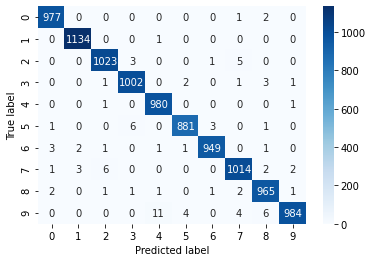



Matthews correlation coefficient (MCC): 0.9898884667789948


In [14]:
acc_score, mcc = pl.show_metrics(model, pl.test_loader, heatmap=True)

In [15]:
wandb.run.summary["accuracy"] = acc_score
wandb.run.summary["MCC"] = mcc

wandb.finish()

train_loss,0.00687
train_acc,0.99764
valid_loss,0.04078
valid_acc,0.99022
lr,0.001
epoch_time,53.24331
_runtime,499
_timestamp,1633894570
_step,10
accuracy,0.9909
MCC,0.98989


train_loss,█▃▂▂▂▁▁▁▁▁
train_acc,▁▆▇▇▇█████
valid_loss,█▄▅▁▃▂▅▂▅▃
valid_acc,▁▄▅▆▅▆▅▇▆█
lr,▁▁▁▁▁▁▁▁▁▁
epoch_time,▁▂▄▄▁▃▃▃▆█
_runtime,▁▂▃▃▄▅▆▆▇██
_timestamp,▁▂▃▃▄▅▆▆▇██
_step,▁▂▂▃▄▅▅▆▇▇█
